# Jet Resolution

Jets are stochastic objects. The content of jets fluctuates quite a lot, and the content also depends on what actually caused the jet (uds quarks, gluons, etc). In addition, there are experimental limitations to the measurement of jets. Both of these aspects limit the accuracy to which we can measure the 4-momentum of a jet. This is called the jet resolution. If you have a group of single pions that have the same energy, the energy measured by CMS will not be exactly the same every time, but will typically follow a (roughly) Gaussian distribution with a mean and a width. The mean is corrected using the jet energy corrections. It is impossible to "correct" for all resolution effects on a jet-by-jet basis, although regression techniques can account for many effects.

As such, there will always be some experimental and theoretical uncertainty in the jet energy measurement, so this is the jet energy resolution. There is also jet angular resolution, and jet mass resolution. We will demonstrate how to apply the jet energy resolution, since that is applicable for all analyses that use jets. More information can be found at the jet resolution twiki and jet resolution software guide. The resolution is measured in data for different eta bins, and was approximately 10% with a 10% uncertainty for 7 TeV and 8 TeV data. For precision, it is important to use the correctly measured resolutions, but a reasonable calculation is to assume a flat 10% uncertainty for simplicity.

To perform this on `pat::Jets` in MC miniAOD, the syntax is:

```
smear = getJER(jet.eta(), 0) #JER nominal=0, up=+1, down=-1
smearUp = getJER(jet.eta(), 1) #JER nominal=0, up=+1, down=-1
smearDn = getJER(jet.eta(), -1) #JER nominal=0, up=+1, down=-1
recopt = jet.pt()
genpt = genJet.pt()
deltapt = (recopt-genpt)*(smear-1.0)
deltaptUp = (recopt-genpt)*(smearUp-1.0)
deltaptDn = (recopt-genpt)*(smearDn-1.0)
ptsmear = max(0.0, (recopt+deltapt)/recopt)
ptsmearUp = max(0.0, (recopt+deltaptUp)/recopt)
ptsmearDn = max(0.0, (recopt+deltaptDn)/recopt)
corr *= ptsmear
corrUp *= ptsmearUp
corrDn *= ptsmearDn
```

You can see that the smearing scales the difference between the reconstructed and truth-level jet $p_{\mathrm{T}}$s. The smearing value is taken from the function `getJER()`. 

Run the cell below to create histograms with the JER smearing applied. As usual, open `jmedas_make_histograms.py` again, and understand what the `getJER()` function does.  

In [1]:
%%bash
python $CMSSW_BASE/src/Analysis/JMEDAS/scripts/jmedas_make_histograms.py --files=$CMSSW_BASE/src/Analysis/JMEDAS/data/MiniAODs/RunIIFall17MiniAODv2/ttjets.txt --outname=$CMSSW_BASE/src/Analysis/JMEDAS/notebooks/files/ttjets_corr_smear.root --maxevents=2000 --maxjets=2 --correctJets Fall17_17Nov2017_V32_MC --smearJets


Added root://cmsxrootd.fnal.gov//store/mc/RunIIFall17MiniAODv2/TTJets_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/20000/68753E9C-6D5E-E811-BC40-24BE05C4D821.root
Added root://cmsxrootd.fnal.gov//store/mc/RunIIFall17MiniAODv2/TTJets_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/20000/EA397089-9260-E811-8C95-4C79BA3201D5.root
Added root://cmsxrootd.fnal.gov//store/mc/RunIIFall17MiniAODv2/TTJets_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/20000/DCFEEE83-AD65-E811-B55A-24BE05CEEB81.root
Added root://cmsxrootd.fnal.gov//store/mc/RunIIFall17MiniAODv2/TTJets_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/20000/E4C77940-1167-E811-A604-A0369FC513DC.root
Added root://cmsxrootd.fnal.gov//store/mc/RunIIFall17MiniAODv2/TTJets_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/20000/6E

...and run the following cell to plot the histograms. 

For our sample, which has a larger effect, jet energy correction uncertainty, or jet energy resolution uncertainty?


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


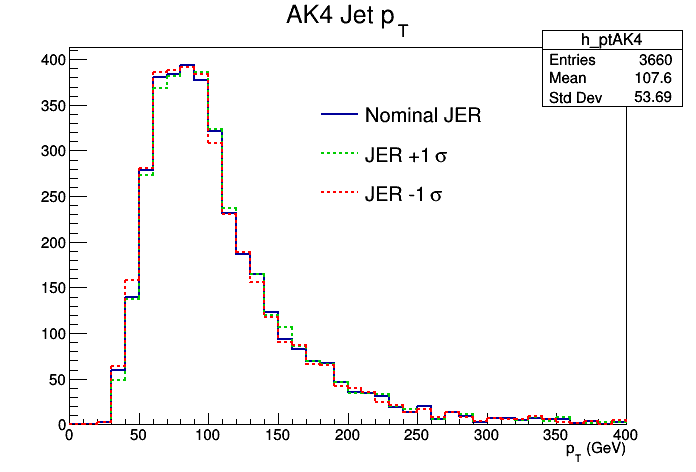

In [4]:
import ROOT

f = ROOT.TFile("files/ttjets_corr_smear.root")
h_ptAK4   = f.Get("h_ptAK4")
h_ptAK4Up  = f.Get("h_ptUpAK4")
h_ptAK4Down  = f.Get("h_ptDownAK4")
h_ptAK4Up.SetLineStyle(2)
h_ptAK4Up.SetLineColor(ROOT.kGreen+1) 
h_ptAK4Down.SetLineStyle(2)
h_ptAK4Down.SetLineColor(ROOT.kRed) 
h_ptAK4Up.SetLineWidth(2)
h_ptAK4Down.SetLineWidth(2)
h_ptAK4.SetLineWidth(2)

c = ROOT.TCanvas('c', 'c')

h_ptAK4.Draw()
h_ptAK4Up.Draw("same")
h_ptAK4Down.Draw("same")
h_ptAK4.GetXaxis().SetRangeUser(0, 400)

leg = ROOT.TLegend(0.45, 0.55, 0.75, 0.8)
leg.AddEntry(h_ptAK4, "Nominal JER", "l")
leg.AddEntry(h_ptAK4Up, "JER +1 #sigma", "l")
leg.AddEntry(h_ptAK4Down, "JER -1 #sigma", "l")
leg.SetLineWidth(0)
leg.SetFillColor(0)
leg.SetShadowColor(0)
leg.Draw()

c.Draw()

## Dijet resonance peaks
As a final exercise for the first part of this exercise, let's look at a simple dijet resonance peak. The following cell will produce histograms from an MC sample of Randall-Sundrum gravitons (RSGs) with m=3 TeV decaying to two quarks. The resulting signature is two high-$p_{mathrm{T}}$ jets, with a truth-level invariant mass of 3 TeV. 

In [ ]:
%%bash
python $CMSSW_BASE/src/Analysis/JMEDAS/scripts/jmedas_dijets.py --files=$CMSSW_BASE/src/Analysis/JMEDAS/data/MiniAODs/RunIIFall17MiniAODv2/rsgluon_qq_3000GeV.txt --outname=$CMSSW_BASE/src/Analysis/JMEDAS/notebooks/files/ttjets_corr_smear.root --maxevents=5000 --maxjets=2 --correctJets Fall17_17Nov2017_V32_MC --smearJets


# Conclusion

This is the end of part 1 of the jets short exercise. If there is spare time remaining, we suggest going through some of the reference material from the first exercise. Otherwise, let's move on to part 2, where we'll talk about jet substructure.